In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [2]:
df = pd.read_csv('student.csv')
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
#sum of null values
df.isnull().sum()


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [7]:
df.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


In [8]:
df.iloc[:,1:].corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


In [9]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [10]:
#rename columns
df.rename(columns=({'gender':'Gender','race/ethnicity':'Race/Ethnicity'
                     ,'parental level of education':'Parental_Level_of_Education'
                     ,'lunch':'Lunch','test preparation course':'Test_Preparation_Course'
                      ,'math score':'Math_Score','reading score':'Reading_Score'
                     ,'writing score':'Writing_Score'}),inplace=True)

d:\python\odyn\anak2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Math_Score', ylabel='Density'>

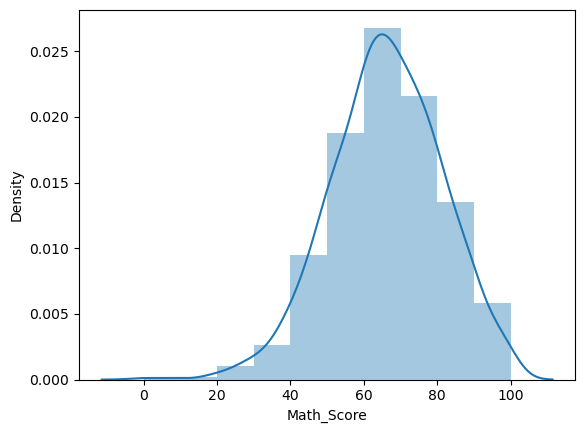

In [11]:
#math score
sns.distplot(df['Math_Score'],bins=10,kde=True)



In [12]:
#how many students passed in math
df['Math_PassStatus'] = np.where(df['Math_Score']<40,'F','P')
df.Math_PassStatus.value_counts()


P    960
F     40
Name: Math_PassStatus, dtype: int64

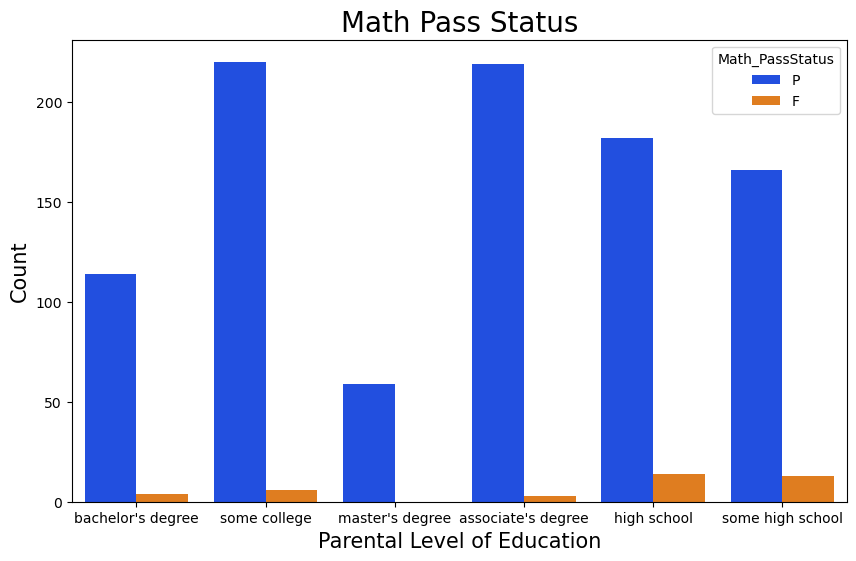

In [13]:
#plot math pass status
sns.countplot(x='Parental_Level_of_Education',data=df,hue='Math_PassStatus',palette='bright')
#make it bigger
plt.gcf().set_size_inches(10,6)
plt.title('Math Pass Status',fontsize=20)
plt.xlabel('Parental Level of Education',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()


d:\python\odyn\anak2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Reading_Score', ylabel='Density'>

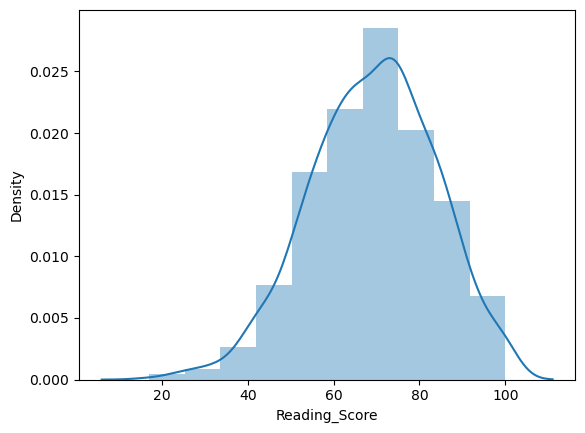

In [14]:
#reading score
sns.distplot(df['Reading_Score'],bins=10,kde=True)


In [15]:
#how many students passed in reading
df['Reading_PassStatus'] = np.where(df['Reading_Score']<40,'F','P')
df.Reading_PassStatus.value_counts()


P    974
F     26
Name: Reading_PassStatus, dtype: int64

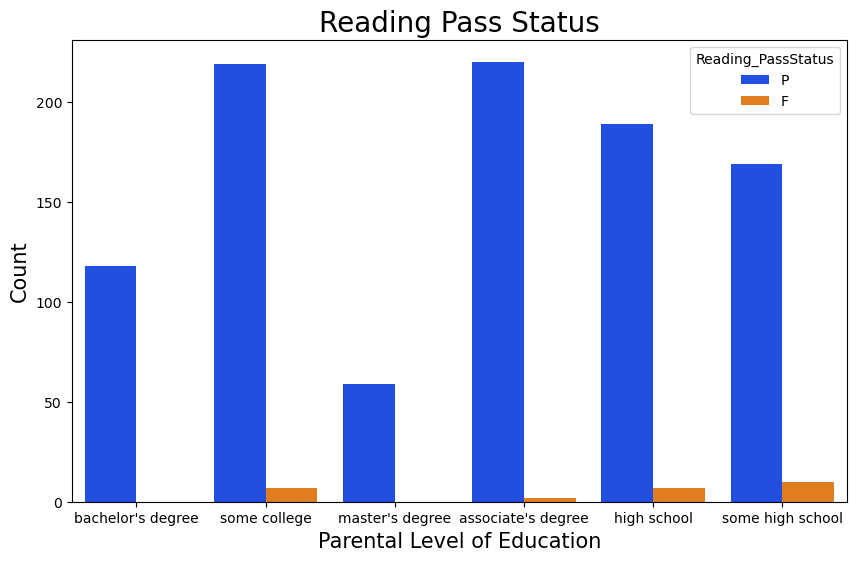

In [16]:
#plot reading pass status
sns.countplot(x='Parental_Level_of_Education',data=df,hue='Reading_PassStatus',palette='bright')
#make it bigger
plt.gcf().set_size_inches(10,6)
plt.title('Reading Pass Status',fontsize=20)
plt.xlabel('Parental Level of Education',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()


d:\python\odyn\anak2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Writing_Score', ylabel='Density'>

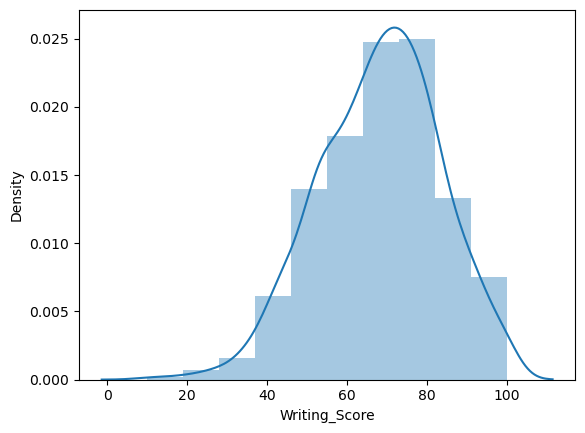

In [17]:
#writing score
sns.distplot(df['Writing_Score'],bins=10,kde=True)


In [18]:
#how many students passed in writing
df['Writing_PassStatus'] = np.where(df['Writing_Score']<40,'F','P')
df.Writing_PassStatus.value_counts()


P    968
F     32
Name: Writing_PassStatus, dtype: int64

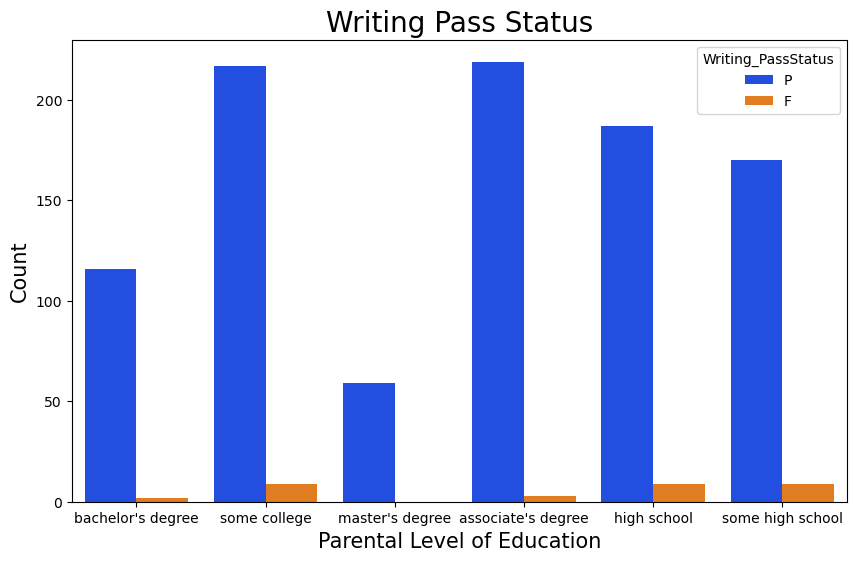

In [19]:
#plot writing pass status
sns.countplot(x='Parental_Level_of_Education',data=df,hue='Writing_PassStatus',palette='bright')
#make it bigger
plt.gcf().set_size_inches(10,6)
plt.title('Writing Pass Status',fontsize=20)
plt.xlabel('Parental Level of Education',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()


d:\python\odyn\anak2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total_Score', ylabel='Density'>

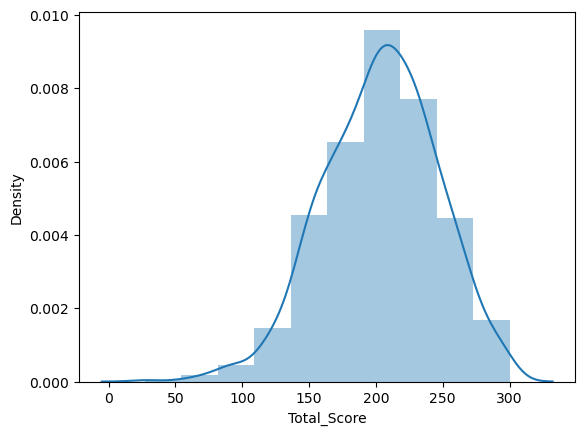

In [20]:
#overall score
df['Total_Score'] = df['Math_Score']+df['Reading_Score']+df['Writing_Score']
sns.distplot(df['Total_Score'],bins=10,kde=True)


In [21]:
#how many students passed in overall
df['Overall_PassStatus'] = np.where(df['Total_Score']<120,'F','P')
df.Overall_PassStatus.value_counts()


P    970
F     30
Name: Overall_PassStatus, dtype: int64

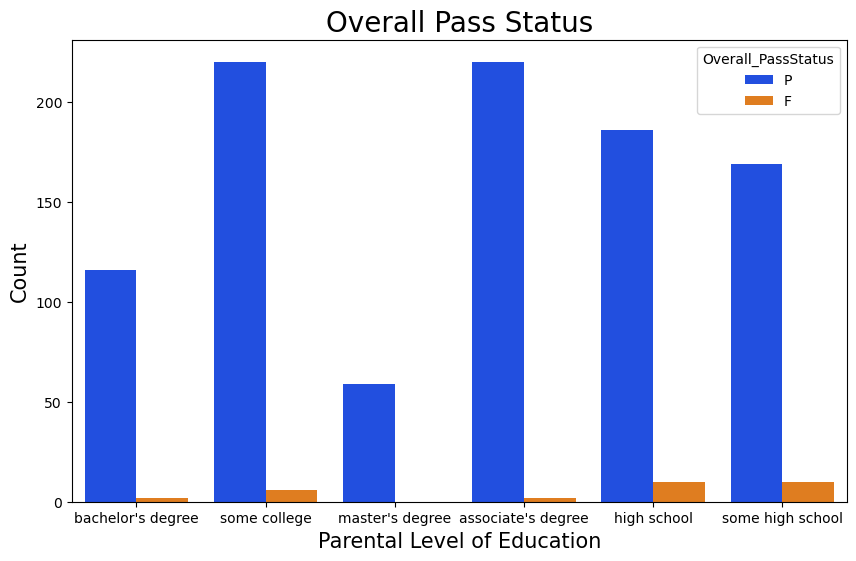

In [22]:
#plot overall pass status
sns.countplot(x='Parental_Level_of_Education',data=df,hue='Overall_PassStatus',palette='bright')
#make it bigger
plt.gcf().set_size_inches(10,6)
plt.title('Overall Pass Status',fontsize=20)
plt.xlabel('Parental Level of Education',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()


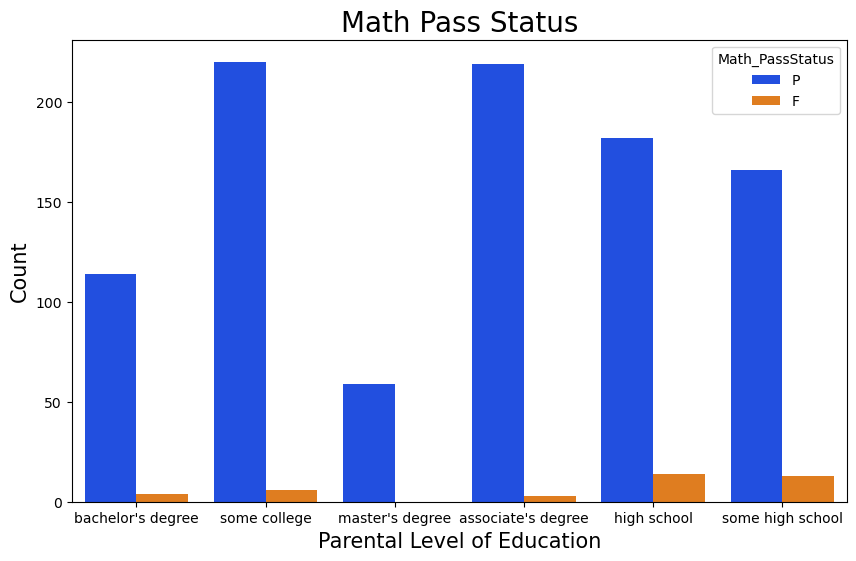

In [23]:
#plotting math pass status
sns.countplot(x='Parental_Level_of_Education',data=df,hue='Math_PassStatus',palette='bright')
#make it bigger
plt.gcf().set_size_inches(10,6)
plt.title('Math Pass Status',fontsize=20)
plt.xlabel('Parental Level of Education',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()


In [24]:
#percentage of marks
df['Math_Percentage'] = df['Math_Score']/100
df['Reading_Percentage'] = df['Reading_Score']/100
df['Writing_Percentage'] = df['Writing_Score']/100
df['Total_Percentage'] = df['Total_Score']/300


d:\python\odyn\anak2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total_Percentage', ylabel='Density'>

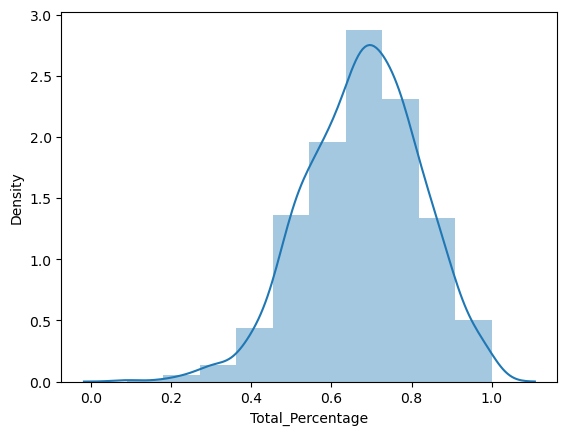

In [25]:
#plotting all marks percentage
sns.distplot(df['Total_Percentage'],bins=10,kde=True)


In [26]:
#assigning grades
def GetGrade(Percentage,Overall_PassStatus):
    if(Overall_PassStatus=='F'):
        return 'F'
    if(Percentage>=0.9):
        return 'A'
    if(Percentage>=0.8):
        return 'B'
    if(Percentage>=0.7):
        return 'C'
    if(Percentage>=0.6):
        return 'D'
    if(Percentage>=0.5):
        return 'E'
    else:
        return 'F'
    
df['Grade'] = df.apply(lambda x : GetGrade(x['Total_Percentage'],x['Overall_PassStatus']),axis=1)
df.Grade.value_counts()

C    261
D    256
E    182
B    146
F    103
A     52
Name: Grade, dtype: int64

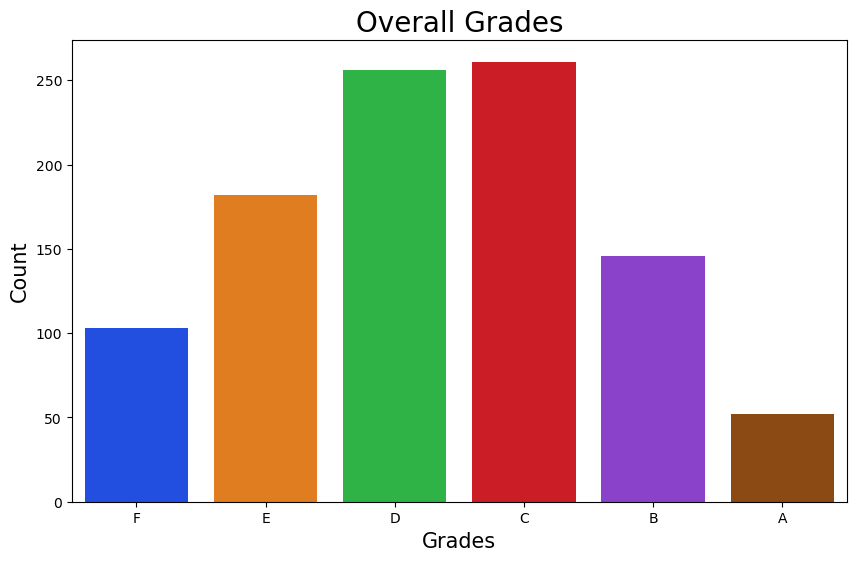

In [27]:
#plotting grades in order from lowest to highest
sns.countplot(x='Grade',data=df,order=['F','E','D','C','B','A'],palette='bright')
#make it bigger
plt.gcf().set_size_inches(10,6)
plt.title('Overall Grades',fontsize=20)
plt.xlabel('Grades',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()


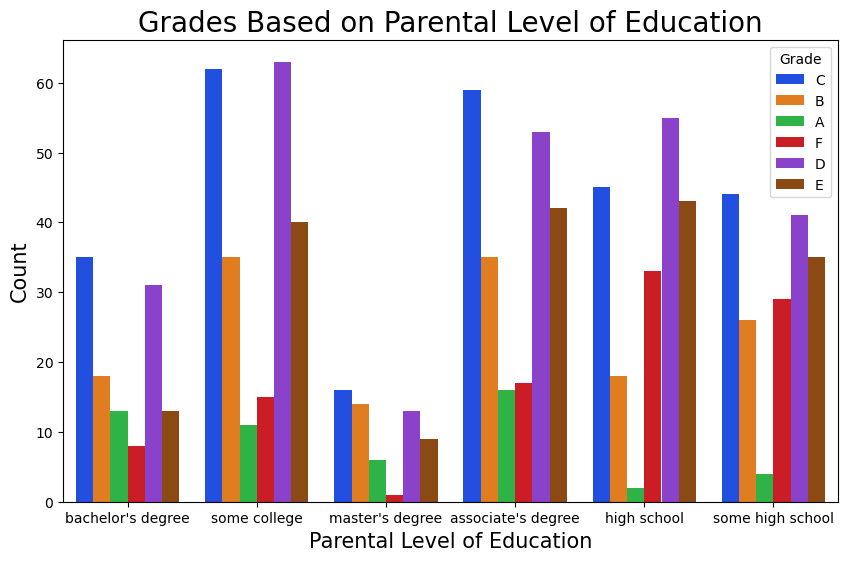

In [28]:
#plotting grades based on parental level of education
sns.countplot(x='Parental_Level_of_Education',data=df,hue='Grade',palette='bright')
#make it bigger
plt.gcf().set_size_inches(10,6)
plt.title('Grades Based on Parental Level of Education',fontsize=20)
plt.xlabel('Parental Level of Education',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()


In [29]:
df.columns

Index(['Gender', 'Race/Ethnicity', 'Parental_Level_of_Education', 'Lunch',
       'Test_Preparation_Course', 'Math_Score', 'Reading_Score',
       'Writing_Score', 'Math_PassStatus', 'Reading_PassStatus',
       'Writing_PassStatus', 'Total_Score', 'Overall_PassStatus',
       'Math_Percentage', 'Reading_Percentage', 'Writing_Percentage',
       'Total_Percentage', 'Grade'],
      dtype='object')

In [30]:
#showing values of test preparation course
df['Test_Preparation_Course'].value_counts()

none         642
completed    358
Name: Test_Preparation_Course, dtype: int64

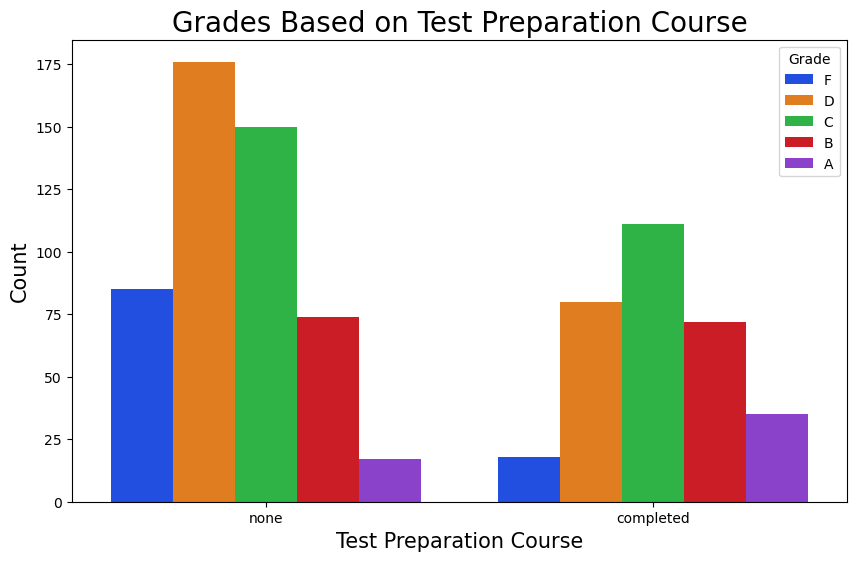

In [34]:
# Specify the order of grades from F to A
grade_order = ['F', 'D', 'C', 'B', 'A']

# Plot the countplot with specified order
sns.countplot(x='Test_Preparation_Course', data=df, hue='Grade',
              order=['none', 'completed'], hue_order=grade_order, palette='bright')

# Adjust the figure size and add labels
plt.gcf().set_size_inches(10, 6)
plt.title('Grades Based on Test Preparation Course', fontsize=20)
plt.xlabel('Test Preparation Course', fontsize=15)
plt.ylabel('Count', fontsize=15)

plt.show()

In [35]:
#showing values of gender
df['Gender'].value_counts()

female    518
male      482
Name: Gender, dtype: int64

In [ ]:
#Grades based on gender
